# 🚀 NetworkX Workshop
## Session 1
### 🌹 Special thanks to Mr. Yahya Hematyar Tabatabaei, whose insightful NetworkX workshop inspired and guided the creation of this notebook

# 🧠 Welcome to the NetworkX Workshop!

This notebook is read-only.

👉 To work on it, click `File → Save a copy in Drive`.  
This will create your own editable version in Google Drive.

Happy coding! 🚀

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tabatabaeiphys/NetworkX/blob/main/netx1.ipynb)





This tutorial will cover:
- Creating graphs in NetworkX
- Working with weighted and directed graphs
- Using edge and node attributes
- MultiGraphs and Bipartite graphs
- adjacency matrix


## importing needed libraries

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

### Creating Graphs


In [ ]:
G = nx.Graph()
G.add_edge('A', 'B')
G.add_edge('C', 'B')


nx.draw(G, with_labels=True)
plt.show()


In [ ]:

G = nx.DiGraph()
G.add_edge('B', 'A')
G.add_edge('B', 'C')

nx.draw(G, with_labels=True, node_color='lightblue', node_size=2000, font_size=16, arrows=True)
plt.title('Directed Graph')
plt.show()



### Weighted Networks


In [ ]:
G = nx.Graph()
G.add_edge('A', 'B', weight=6)
G.add_edge('C', 'B', weight=13)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


### Signed Networks

In [ ]:
G = nx.Graph()
G.add_edge('A', 'B', sign="+")   
G.add_edge('C', 'B', sign="-")   


pos = nx.spring_layout(G)


nx.draw(G, pos, with_labels=True)


signs = nx.get_edge_attributes(G, 'sign')

edge_labels = {}
for edge, sign in signs.items():
    edge_labels[edge] = sign

nx.draw(G, pos, width=2)

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()


### make an example for yourself from above topics

### Node and Edge Attributes



In [ ]:
G = nx.Graph()
G.add_node('A', role='Trader')
G.add_node('C', role='Manager')
G.add_edge('A', 'B', relation='Family', weight=6)

print(G.nodes(data=True))

print(G.edges(data=True))

### let say a person's role in life is to be happy, he is every body's friend but not deeply. choose the weight by yourself and add it to the network above

In [ ]:
from matplotlib.lines import Line2D

G = nx.Graph()
G.add_edge('A', 'B', relation='Friend', weight=18)
G.add_edge('B', 'C', relation='Coworker', weight=21)
G.add_edge('C', 'D', relation='Family', weight=25)
G.add_edge('C', 'E', relation='Neighbor', weight=10)
G.add_edge('E', 'D', relation='Friend', weight=2)
G.add_edge('E', 'F', relation='Coworker', weight=10)
G.add_edge('F', 'G', relation='Friend', weight=9)
G.add_edge('I', 'E', relation='Family', weight=10)
G.add_edge('H', 'E', relation='Coworker', weight=15)
G.add_edge('I', 'J', relation='Neighbor', weight=3)
G.add_edge('J', 'H', relation='Friend', weight=3)

node_roles = {'A': 'Trader', 'B': 'Trader', 'C': 'Manager', 'D': 'Analyst', 'E': 'Manager', 
              'F': 'Trader', 'G': 'Trader', 'H': 'Trader', 'I': 'Analyst', 'J': 'Analyst'}

role_colors = {'Manager': 'red', 'Trader': 'green', 'Analyst': 'yellow'}
node_colors = [role_colors[node_roles[node]] for node in G.nodes]

relation_colors = {'Family': 'brown', 'Friend': 'blue', 'Coworker': 'red', 'Neighbor': 'purple'}
edge_colors = [relation_colors[G[u][v]['relation']] for u, v in G.edges()]

pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_color='white')

nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)

edge_labels = {(u, v): (G[u][v]['weight']) for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=6)

legend_elements_edges = [
    Line2D([0], [0], color='brown', lw=2, label='Family'),
    Line2D([0], [0], color='blue', lw=2, label='Friend'),
    Line2D([0], [0], color='red', lw=2, label='Coworker'),
    Line2D([0], [0], color='purple', lw=2, label='Neighbor')
]

legend_elements_nodes = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Manager'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Trader'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Analyst')
]

plt.legend(handles=legend_elements_edges + legend_elements_nodes, loc='best')

plt.show()


### MultiGraphs



In [ ]:

G = nx.MultiGraph()

G.add_edge('A', 'B', relation='Family', weight=6)
G.add_edge('A', 'B', relation='Coworker', weight=4) 

G.add_edge('A', 'C', relation='Friend', weight=13)
G.add_edge('B', 'C', relation='Coworker', weight=21)
G.add_edge('C', 'D', relation='Family', weight=25)
G.add_edge('C', 'E', relation='Neighbor', weight=10)
G.add_edge('E', 'D', relation='Friend', weight=2)

G.add_edge('E', 'F', relation='Coworker', weight=10)
G.add_edge('E', 'F', relation='Neighbor', weight=5)  

G.add_edge('F', 'G', relation='Friend', weight=9)
G.add_edge('F', 'G', relation='Family', weight=7)  

G.add_edge('I', 'E', relation='Family', weight=10)
G.add_edge('H', 'E', relation='Coworker', weight=15)
G.add_edge('I', 'J', relation='Neighbor', weight=3)
G.add_edge('J', 'H', relation='Friend', weight=3)

relation_colors = {'Family': 'brown', 'Friend': 'blue', 'Coworker': 'red', 'Neighbor': 'purple'}

edge_colors = []
edge_labels = {}

for u, v, key in G.edges(keys=True):
    relation = G[u][v][key]['relation']
    weight = G[u][v][key]['weight']
    
    edge_colors.append(relation_colors[relation])  
    edge_labels[(u, v, key)] = weight  

pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1500, font_size=12)

for u, v, key in G.edges(keys=True):
    relation = G[u][v][key]['relation']
    color = relation_colors[relation]
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=2, edge_color=color,
                           connectionstyle=f'arc3,rad={(0.1 * key)}') 

nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{G[u][v][key]['weight']}" 
                                                 for u, v, key in G.edges(keys=True)}, font_color='black')

legend_elements = [
    Line2D([0], [0], color='brown', lw=2, label='Family'),
    Line2D([0], [0], color='blue', lw=2, label='Friend'),
    Line2D([0], [0], color='red', lw=2, label='Coworker'),
    Line2D([0], [0], color='purple', lw=2, label='Neighbor')
]

plt.legend(handles=legend_elements, loc='best')

plt.show()


### Bipartite Graphs

A bipartite graph contains two sets of nodes, with edges only between nodes of different sets.


# Checking if a Network is Bipartite

A **bipartite graph** is a graph whose vertices can be divided into two disjoint sets, say $U$ and $V$, such that every edge connects a vertex in $U$ to a vertex in $V$. In simpler terms, there are no edges between vertices within the same set. This can be verified by using the **coloring method** or by **searching for odd cycles**.



![Network Diagram](d.png)



## 1. Coloring Method

The **coloring method** involves attempting to color the graph's nodes using two different colors. Here's how it works:

- Start with any unvisited node and assign it a color, say "color 1".
- Assign the neighboring nodes the opposite color, say "color 2".
- Continue this process for all nodes, coloring each node with the color opposite to its neighbors.
- If at any point, two adjacent nodes are assigned the same color, then the graph is **not bipartite**.


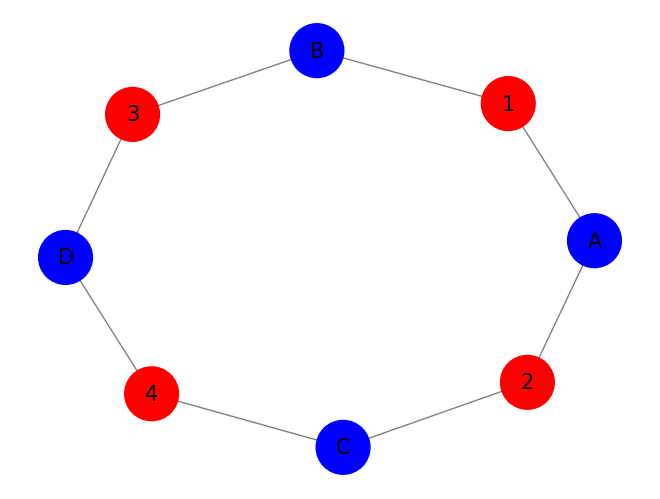

In [20]:
from networkx.algorithms import bipartite
# Create a bipartite graph

B = nx.Graph()
B.add_edges_from([('A', '1'), ('A', '2'), ('B', '1'), ('B', '3'), ('C', '2'), ('C', '4'), ('D', '3'), ('D', '4')])

# Get bipartite sets
X, Y = bipartite.sets(B)

# Color nodes based on their bipartite set
color_map = []
for node in B:
    if node in X:
        color_map.append('blue')
    else:
        color_map.append('red')

# Draw the graph
pos = nx.spring_layout(B)
plt.figure(dpi=100)
nx.draw(B,pos, with_labels=True, node_color=color_map, node_size=1500, edge_color='gray', font_size=15)
plt.show()


![Network Diagram](bi2.png)


## 2. Searching for Odd Cycles

A graph is bipartite **if and only if** it contains **no odd-length cycles**. 

### Summary:

- **Bipartite Graph:** No odd-length cycles, possible to color using two colors.
- **Non-Bipartite Graph:** Presence of odd-length cycles, impossible to color using two colors.


In [ ]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'A'), ('A', 'C')])

cycle = list(nx.find_cycle(G))
print(f"Detected cycle: {cycle}")

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1500, edge_color='black')

cycle_edges = [(cycle[i][0], cycle[i][1]) for i in range(len(cycle))]
nx.draw_networkx_edges(G, pos, edgelist=cycle_edges, width=3, edge_color='red')
plt.show()


### what is the problem here??

### Graph Degree and Adjacency Matrix


![Network Diagram](ad.png)


In [ ]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'A')])
degree = dict(G.degree())
print("Node degrees:", degree)

adj_matrix = nx.adjacency_matrix(G)
print("Adjacency matrix:\n", adj_matrix.todense())


In [19]:

G = nx.Graph()
G.add_edge('A', 'B', relation='Friend', weight=18)
G.add_edge('B', 'C', relation='Coworker', weight=21)
G.add_edge('C', 'D', relation='Family', weight=25)
G.add_edge('C', 'E', relation='Neighbor', weight=10)
G.add_edge('E', 'D', relation='Friend', weight=2)
G.add_edge('E', 'F', relation='Coworker', weight=10)
G.add_edge('F', 'G', relation='Friend', weight=9)
G.add_edge('I', 'E', relation='Family', weight=10)
G.add_edge('H', 'E', relation='Coworker', weight=15)
G.add_edge('I', 'J', relation='Neighbor', weight=3)
G.add_edge('J', 'H', relation='Friend', weight=3)


### calculate the node degrees and adjacency matrix of G

### Thank you for your attention!
